# Importações

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date

import warnings
warnings.filterwarnings('ignore')
from pandas.plotting import autocorrelation_plot

# Importação da base de dados

In [2]:
df_total = pd.read_csv('/content/cases-brazil-states.csv')
df_total.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,0,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,1,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN


# Exploração dos dados

In [3]:
df = df_total[df_total['estado'] != 'TOTAL']
df['data'] = pd.to_datetime(df_total['data']).dt.date
df.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Óbitos')

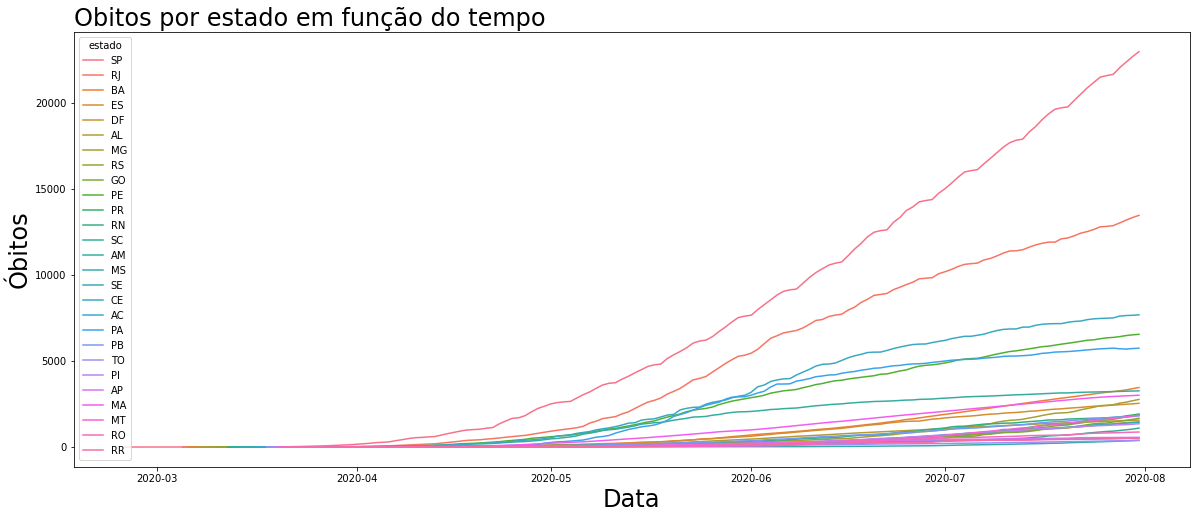

In [4]:
plt.figure(figsize=(20,8))
fig = sns.lineplot(x = 'data', y = 'Obitos', hue = 'estado', data = df)
fig.set_title('Obitos por estado em função do tempo', loc = 'left', fontsize = 24)
fig.set_xlabel('Data', fontsize = 24)
fig.set_ylabel('Óbitos', fontsize = 24)

In [5]:
df_sp = df[df['estado'] == 'SP']
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


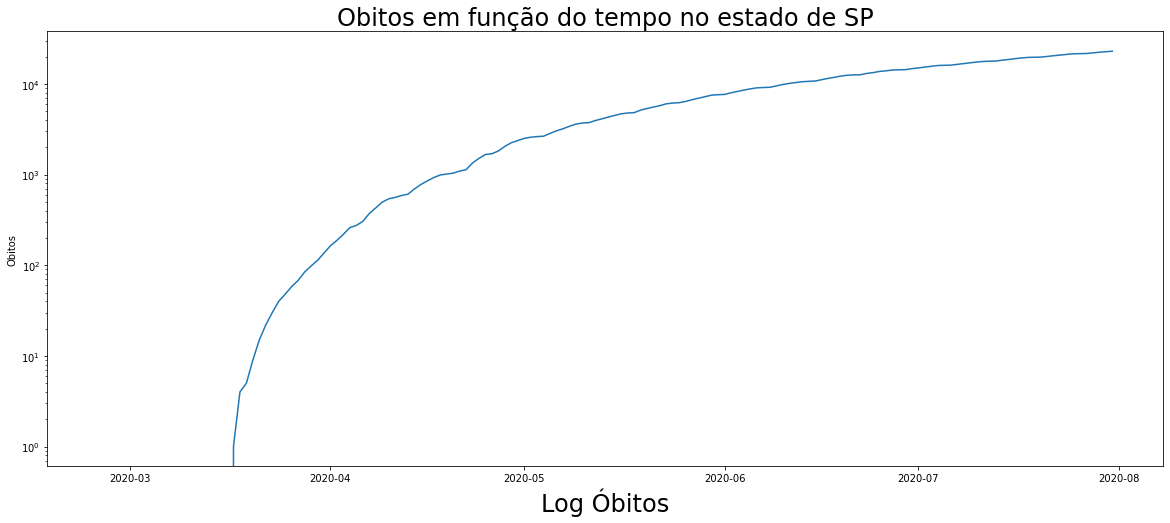

In [80]:
plt.figure(figsize=(20,8))
fig = sns.lineplot(x = 'data', y = 'Obitos', data = df_sp)
fig.set_title('Obitos em função do tempo no estado de SP', fontsize = 24)
fig.set_xlabel('Data', fontsize = 24)
fig.set_xlabel('Log Óbitos', fontsize = 24)
fig.set_yscale('log')

A transformada logarítmica diminui o efeito do viés e da presença de outliers em dados.

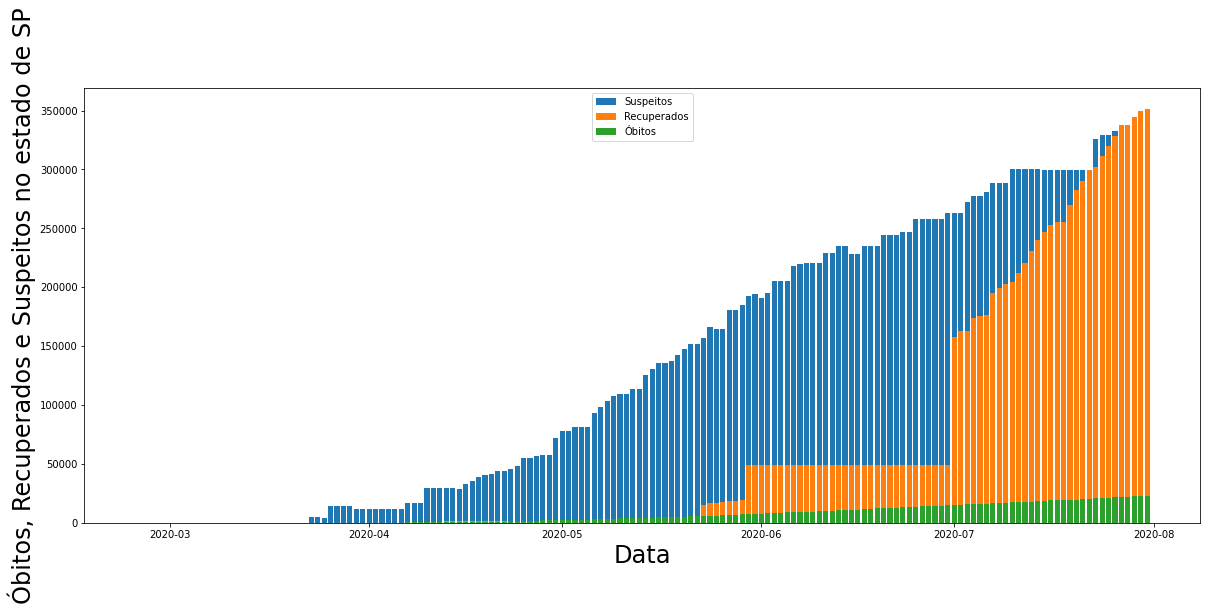

In [7]:
plt.figure(figsize=(20,8))
fig = plt.bar(df_sp.data, df_sp.suspeitos, label ='Suspeitos')
fig = plt.bar(df_sp.data, df_sp.recuperados, label ='Recuperados')
fig = plt.bar(df_sp.data, df_sp.Obitos, label ='Óbitos')
plt.xlabel('Data', fontsize = 24)
plt.ylabel('Óbitos, Recuperados e Suspeitos no estado de SP', fontsize = 24, rotation = 90)
plt.legend()

fonte: https://g1.globo.com/sp/sao-paulo/noticia/2020/07/01/governo-de-sp-divulga-pela-1a-vez-total-de-recuperados-entre-casos-leves-de-covid-19-e-numero-somados-as-altas-hospitalares-vai-a-157-mil.ghtml

Em maio só as pessoas que estavam internadas e saiam da internação que eram contabilizadas como recuperadas e ao longo dos meses houve uma mudança de metodologia. O dados dos recuperados em junho não foram divulgados e isso não significa que não existe nenhum recuperado, significa que não temos os dados. Apartir de julho os pacientes que não estavam no hospital também começou a ser contabilizado.

In [8]:
def plotar_linha(titulo, xlabel, ylabel, x, y, dataset, hue):
  ax = sns.lineplot (x = x, y = y, hue = hue, data = dataset)
  ax.figure.set_size_inches(12,6)
  ax.set_title(titulo, loc = 'left', fontsize = 20)
  ax.set_xlabel(xlabel, fontsize = 20)
  ax.set_ylabel(xlabel, fontsize = 20, rotation = 90)

In [9]:
def plotar_barra(titulo, xlabel, ylabel, x, y, dataset):
  plt.figure(figsize = (20,6))
  ax = plt.bar(dataset[x], dataset[y])
  plt.title(titulo, loc = 'left', fontsize = 20)
  plt.xlabel(xlabel, fontsize = 20)
  plt.ylabel(ylabel, fontsize = 20, rotation = 90)

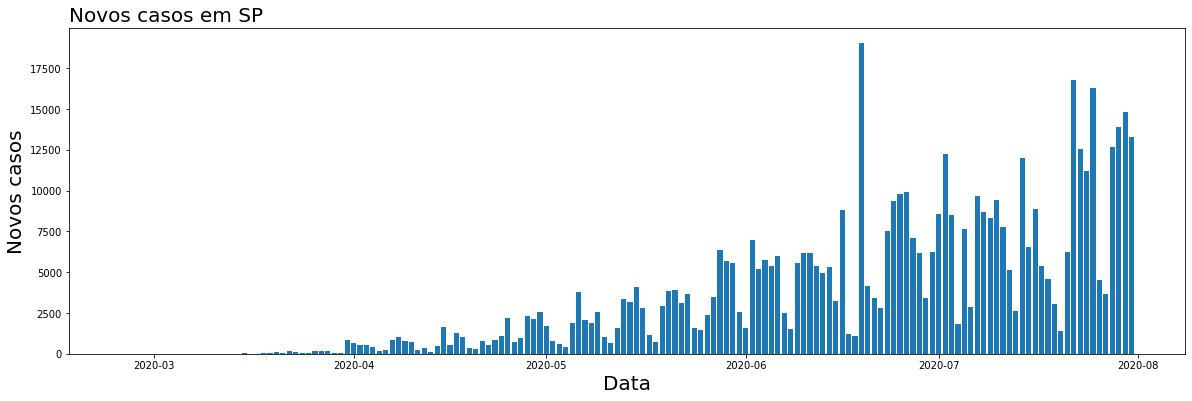

In [10]:
plotar_barra('Novos casos em SP', 'Data', 'Novos casos', 'data', 'novosCasos', df_sp)

In [11]:
df_sp['aceleracaoCasos'] = df_sp['novosCasos'].diff()
df_sp['aceleracaoObitos'] = df_sp['novosObitos'].diff()
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,-1.0,0.0
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,0.0,0.0
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,1.0,0.0
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,-1.0,0.0


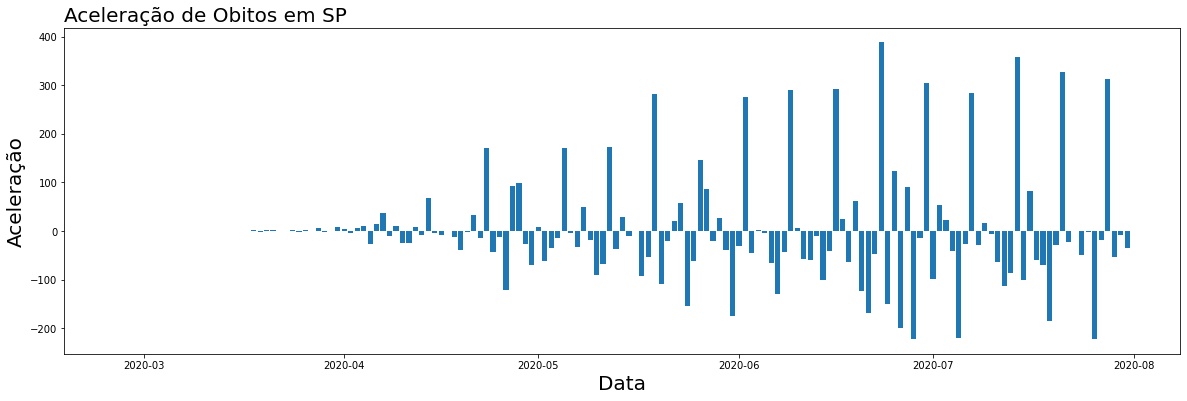

In [12]:
plotar_barra('Aceleração de Obitos em SP', 'Data', 'Aceleração', 'data', 'aceleracaoObitos', df_sp)

In [13]:
df_sp['mediaObitos'] = df_sp.novosObitos.rolling(window = 7, center = False).mean()
df_sp['mediaObitos_14'] = df_sp.novosObitos.rolling(window = 14, center = False).mean()
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos,mediaObitos,mediaObitos_14
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN


<BarContainer object of 158 artists>

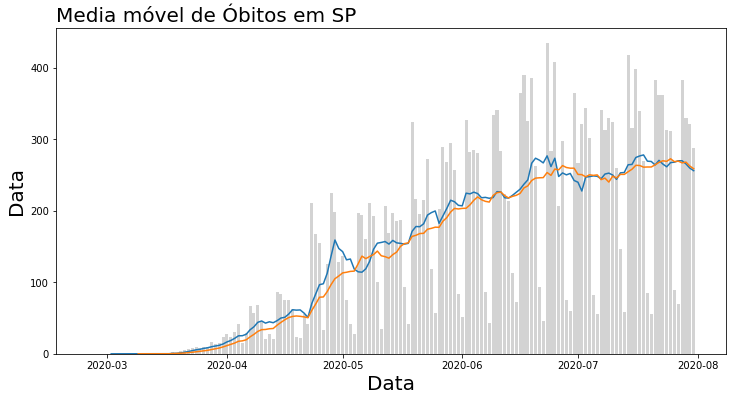

In [14]:
plotar_linha('Media móvel de Óbitos em SP', 'Data', 'Media', 'data', 'mediaObitos', df_sp, None)
plotar_linha('Media móvel de Óbitos em SP', 'Data', 'Media', 'data', 'mediaObitos_14', df_sp, None)

plt.bar(df_sp['data'], df_sp['novosObitos'], color = 'lightgrey')

* A média móvel permite que oscilações de período curto sejam suavizadas. Além disso, oscilações randômicas ou sem explicação realista para o modelo são removidas.
* A média móvel é uma das ferramentas usadas para comparar períodos iguais e, então, determinar se há um aumento médio ou um decrescimento médio da variável analisada.

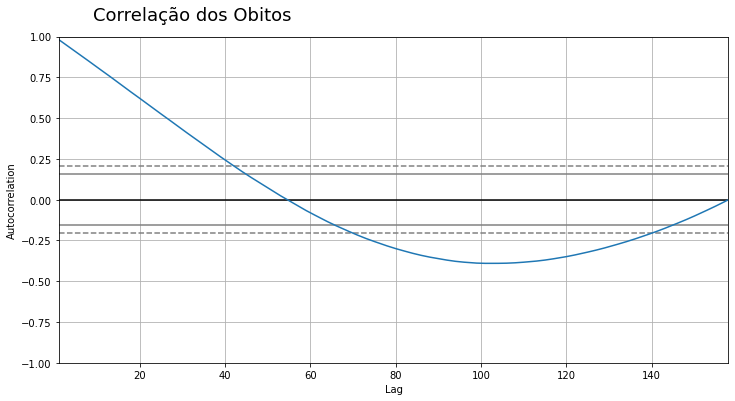

In [18]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação dos Obitos', fontsize = 18, x = 0.28, y = 0.95)
autocorrelation_plot(df_sp['Obitos'])
ax = ax

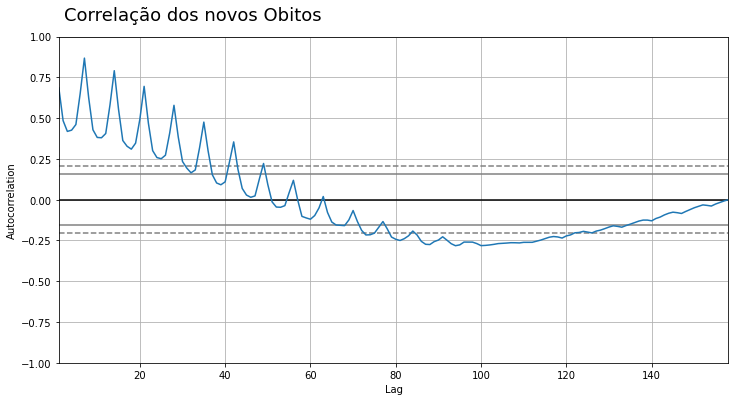

In [19]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação dos novos Obitos', fontsize = 18, x = 0.28, y = 0.95)
autocorrelation_plot(df_sp['novosObitos'])
ax = ax

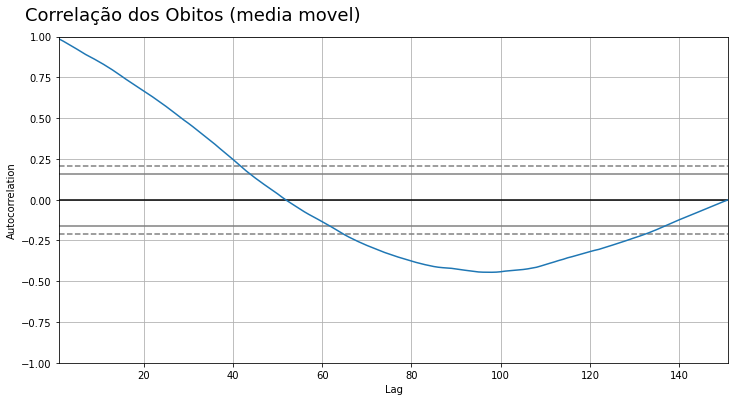

In [20]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação dos Obitos (media movel)', fontsize = 18, x = 0.28, y = 0.95)
autocorrelation_plot(df_sp['mediaObitos'][7:])
ax = ax

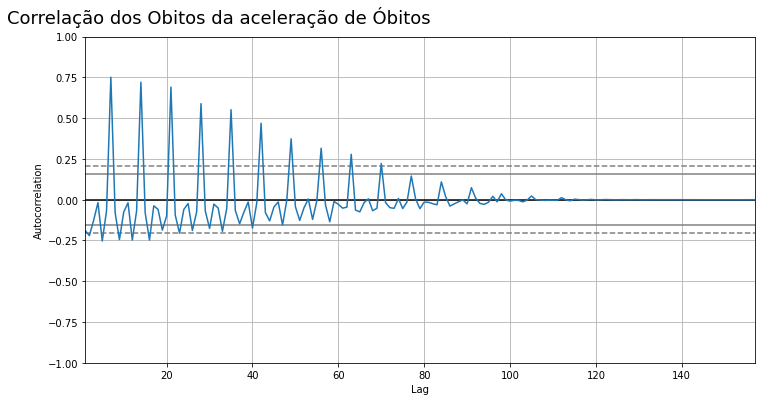

In [21]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação dos Obitos da aceleração de Óbitos', fontsize = 18, x = 0.28, y = 0.95)
autocorrelation_plot(df_sp['aceleracaoObitos'][1:])
ax = ax

In [25]:
df_sp['mes'] = pd.to_datetime(df_sp['data'])
df_sp['dia_da_semana'] = df_sp['mes'].dt.day_name()
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos,mediaObitos,mediaObitos_14,mes,dia_da_semana
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-25,Tuesday
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,2020-02-26,Wednesday
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,2020-02-27,Thursday
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,2020-02-28,Friday
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,2020-02-29,Saturday


In [26]:
dias_traduzidos = {
    'Monday': 'Segunda',
    'Tuesday': 'Terça',
    'Wednesday': 'Quarta',
    'Thursday': 'Quinta',
    'Friday': 'Sexta',
    'Saturday': 'Sabado',
    'Sunday': 'Domingo'
}

In [27]:
df_sp['dia_da_semana'] = df_sp['dia_da_semana'].map(dias_traduzidos)

In [28]:
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos,mediaObitos,mediaObitos_14,mes,dia_da_semana
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-25,Terça
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,2020-02-26,Quarta
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,2020-02-27,Quinta
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,2020-02-28,Sexta
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,2020-02-29,Sabado


In [29]:
agrupados_sp = df_sp.groupby('dia_da_semana')['Obitos', 'novosObitos', 'aceleracaoObitos'].mean().round()

In [30]:
agrupados_sp['dia_da_semana'] = agrupados_sp.index

In [32]:
agrupados_sp.head(7)

,Obitos,novosObitos,aceleracaoObitos,dia_da_semana
dia_da_semana,,,,
Domingo,6846.0,60.0,-95.0,Domingo
Quarta,6975.0,181.0,-25.0,Quarta
Quinta,7165.0,190.0,9.0,Quinta
Sabado,6786.0,155.0,-17.0,Sabado
Segunda,6887.0,41.0,-20.0,Segunda
Sexta,7342.0,177.0,-13.0,Sexta
Terça,6794.0,206.0,175.0,Terça


In [33]:
agrupados_sp = agrupados_sp.reindex(['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sabado'])

In [34]:
agrupados_sp.head()

,Obitos,novosObitos,aceleracaoObitos,dia_da_semana
dia_da_semana,,,,
Domingo,6846.0,60.0,-95.0,Domingo
Segunda,6887.0,41.0,-20.0,Segunda
Terça,6794.0,206.0,175.0,Terça
Quarta,6975.0,181.0,-25.0,Quarta
Quinta,7165.0,190.0,9.0,Quinta


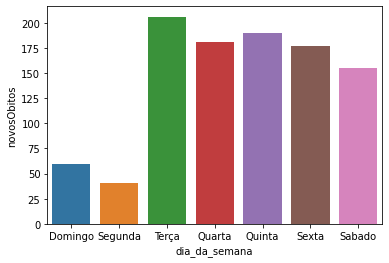

In [35]:
sns.barplot(agrupados_sp['dia_da_semana'], agrupados_sp.novosObitos)

In [45]:
def criar_features(df,label=None):
    df = df.copy()
    df['diasemana'] = df['mes'].dt.dayofweek
    df['mês'] = df['mes'].dt.month
    df['diamês'] = df['mes'].dt.day
    
    X = df[['diasemana','mês','diamês']]
    
    if label:
        y = df[label]
        return X,y
    return X

In [46]:
X, y = criar_features(df_sp,label='Obitos')

In [47]:
df_final = pd.concat([X, y], axis = 1)

In [70]:
df_final.head(10)

,diasemana,mês,diamês,Obitos
0,1,2,25,0
2,2,2,26,0
4,3,2,27,0
6,4,2,28,0
8,5,2,29,0
10,6,3,1,0
12,0,3,2,0
14,1,3,3,0
16,2,3,4,0
19,3,3,5,0
